# 2d and then added the explanatory variabvles. 
- created 12/10
- what do i want 
    - prescribed fire loc and area
    - vegetation at each loc
    - something else> 

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy.ndimage as ndi

import geopandas as gpd
import contextily as cx
import pandas as pd
import fiona
import glob
from pprint import pprint

def rm_invalid_years(df):
    for j in np.where(pd.isnull(df.YEAR_))[0]:
        df.YEAR_[j] = 0

    for k,m in enumerate(df.YEAR_):
        try:
            m = int(m)
        except:
            if m == '':
                df.YEAR_[k] = 0
    for k,m in enumerate(df.YEAR_):
        if m !=0 and len(m)==1:
            df.YEAR_[k]=0
    return(df)

In [5]:
basedir = "/home/ubuntu/sequoia/datasets/"


In [6]:
states = gpd.read_file(basedir+'ref_map/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3310")
cali = states[states['NAME'] == 'California']

In [154]:
f = basedir + "/CA_SEGI_groves/CA_Sierra_groves.shp"
df_grove = gpd.read_file(f)

In [155]:
df_grove.head()

,OBJECTID,Grove_Name,Shape_Leng,Shape_Area,Acres,geometry
0,1,Abbott,1255.684024,1.005677e+05,25,"POLYGON ((91094.630 -139421.060, 91083.930 -13..."
1,2,Agnew,1728.807964,1.748466e+05,43,"POLYGON ((108999.130 -136334.570, 108996.690 -..."
2,3,Alder Creek,9953.327421,3.758521e+06,929,"POLYGON ((122450.300 -200788.840, 122472.540 -..."
3,4,Atwell,30844.035576,5.418057e+06,1339,"MULTIPOLYGON (((118138.534 -170044.978, 118164..."
4,5,Bearskin,4060.802457,7.586944e+05,187,"POLYGON ((96662.050 -140194.200, 96666.770 -14..."


In [204]:
f = basedir + "/calwater221/calwater2.2.1.gdb/calwater2.2.1.gdb"
print(fiona.listlayers(f))
l_id = 1
print(fiona.listlayers(f)[l_id])
df_wat = gpd.read_file(f, layer = l_id)
df_wat = df_wat.to_crs("EPSG:3310")
df_wat.head()
# This dataset contains hydrologic regions, huc 8 watershed boundaries, 
# and planning unit watershed boundaries for the state of California 


['calw221', 'calw221_hr', 'calw221_huc_8', 'calw221_hrAnno']
calw221_hr


,HR,HRNAME,Shape_Length,Shape_Area,RuleID,Override,geometry
0,5,Sacramento River,2.029461e+06,7.045823e+10,5,None,"MULTIPOLYGON (((-240705.406 160517.363, -24071..."
1,1,North Coast,1.893735e+06,5.035660e+10,3,None,"MULTIPOLYGON (((-234383.466 167504.419, -23442..."
2,8,North Lahontan,1.407030e+06,1.582361e+10,4,None,"MULTIPOLYGON (((-495.298 134723.170, -495.442 ..."
3,2,San Francisco Bay,8.065795e+05,1.170720e+10,6,None,"MULTIPOLYGON (((-216180.231 -57671.972, -21619..."
4,6,San Joaquin,1.197134e+06,3.966420e+10,7,None,"MULTIPOLYGON (((93269.243 -90774.923, 93227.29..."


<AxesSubplot: >

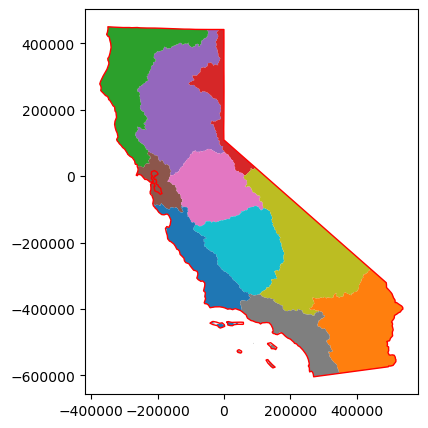

In [205]:
ax = cali.boundary.plot(color='red', alpha = 1, lw = 1,figsize = (5,5))
df_wat.plot(ax = ax, column='HRNAME',legend=False, alpha =1)

In [149]:
f = basedir + 'S_USA.RAVG_Perimeters.gdb'
df_ravg = gpd.read_file(f)
df_ravg = df_ravg.to_crs("EPSG:3310")

cali_index = np.where([re.split('(\d+)',s)[0]=='CA' for s in df_ravg.FIRE_ID])
df_ravg_cali = df_ravg.iloc[cali_index]

year_index = np.where([int(s)>=2017 for s in df_ravg_cali.FIRE_YEAR])
df_ravg_cali = df_ravg_cali.iloc[year_index]
print(df_ravg_cali.shape)

filter by collection ids and asset keys: 41748it [50:41, 13.73it/s]                      


(72, 7)


In [150]:
f = basedir + 'ds397/ds397.gdb'
fiona.listlayers(f)
df_px = gpd.read_file(f)
df_px = rm_invalid_years(df_px)
print(df_px.shape)
year_index = np.where([int(s)>=2017 for s in df_px.YEAR_.astype(int)])
df_px = df_px.iloc[year_index]
print(df_px.shape)

(7320, 17)
(2408, 17)


/tmp/ipykernel_1742/3967471920.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.YEAR_[k] = 0
/tmp/ipykernel_1742/3967471920.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.YEAR_[k]=0


In [151]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

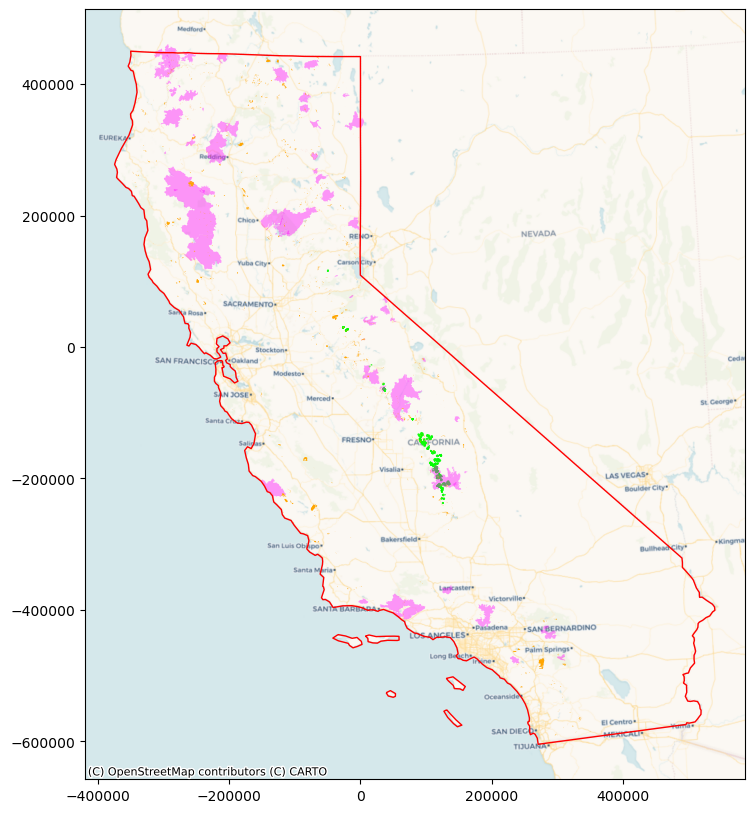

In [209]:
ax = cali.boundary.plot(color='red', alpha = 1, lw = 1,figsize = (10,10))
ax = df_grove.plot(ax = ax, column='Acres', alpha=0.9, edgecolor='lime')
df_ravg_cali.plot(ax = ax, color = 'magenta', legend=False, alpha = 0.4)
df_px.plot(ax = ax, color = 'orange', label = 'fooooo')
# df_foo.plot(ax = ax, color = 'black', label = 'fooooo')
cx.add_basemap(ax,crs=df_grove.crs.to_string(), source=cx.providers.CartoDB.Voyager)

In [212]:
df_wat.select_dtypes(include = 'object').head()

,HRNAME,Override
0,Sacramento River,None
1,North Coast,None
2,North Lahontan,None
3,San Francisco Bay,None
4,San Joaquin,None


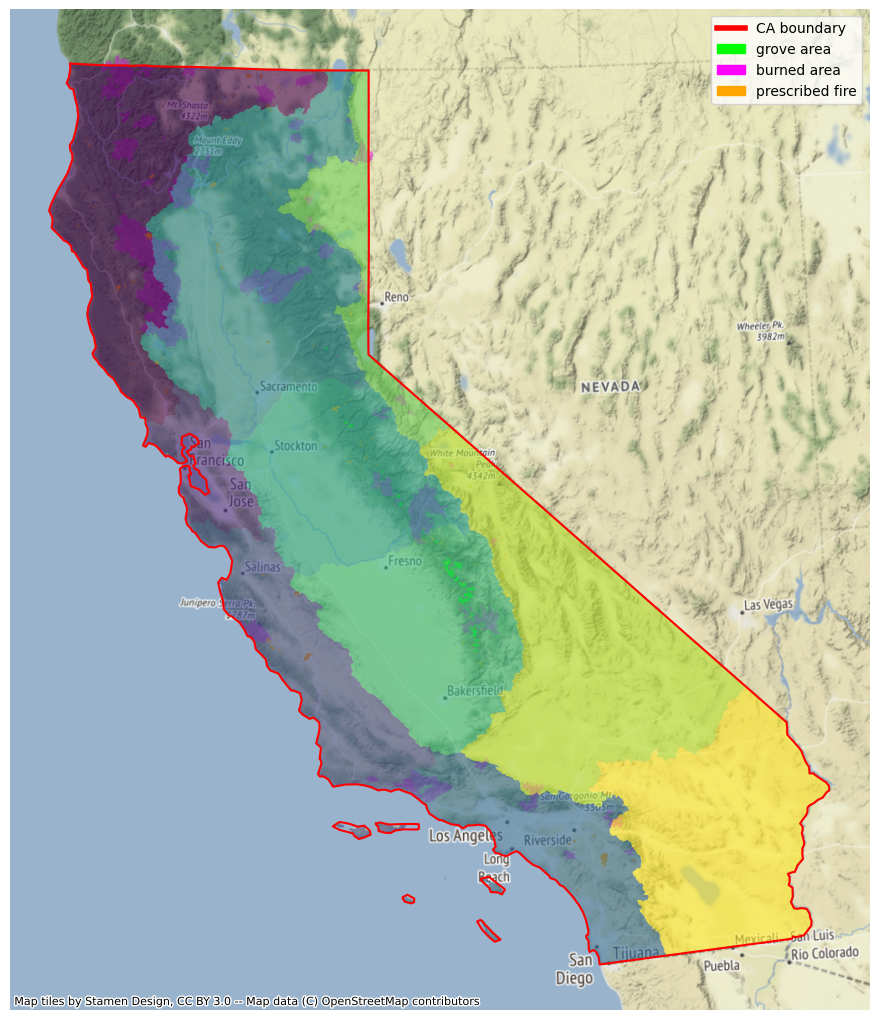

In [221]:
ax = cali.boundary.plot(color='red', alpha = 1, lw = 1.5,figsize = (25,13))
ax = df_grove.plot(ax = ax, column='Acres', alpha=0.9, edgecolor='lime')

df_ravg_cali.plot(ax = ax, color = 'magenta', legend=False, alpha = 0.4)
df_px.plot(ax = ax, color = 'orange', label = 'fooooo')
df_wat.plot(ax = ax, column= 'HR', alpha = 0.6)
cx.add_basemap(ax,crs=df_grove.crs.to_string(), alpha = 1)


legend_elements = [Line2D([0], [0], color='red', lw=4, label='CA boundary'),
                   Patch(facecolor='lime', edgecolor='lime',label='grove area'),
                   Patch(facecolor='magenta', edgecolor='magenta',label='burned area'),
                   Patch(facecolor='orange', edgecolor='orange',label='prescribed fire')]
ax.legend(handles=legend_elements, loc='upper right')
ax.axis("off");


In [222]:
cali_coords = np.array(cali.geometry[0].convex_hull.boundary.coords.xy).T
cali_coords_re = (cali_coords-np.min(cali_coords,0))//100 
img_shape = ((np.ptp(cali_coords,0)//100).astype(int))

In [367]:
from shapely.geometry import Point

zoom_scl = 20000
grove_cent = [(np.array(g.centroid.coords)-np.min(cali_coords,0))//zoom_scl for g in df_grove.geometry]
grove_cent = (np.array(grove_cent)).squeeze()
grove_area = np.array(df_grove.Acres)

ravg_cent = [(np.array(g.centroid.coords)-np.min(cali_coords,0))//zoom_scl for g in df_ravg_cali.geometry]
ravg_cent = (np.array(ravg_cent)).squeeze()
ravg_area = np.array(df_ravg_cali.ACRES)

px_cent = [(np.array(g.centroid.coords)-np.min(cali_coords,0))//zoom_scl  for g in df_px.geometry]
px_cent = (np.array(px_cent)).squeeze()
px_area = np.array(df_px.GIS_ACRES)


df_grove_wat_HR = []
for g in df_grove.geometry:
    p1 = Point(g.centroid.coords)
    hr_i = np.where([p1.within(g) for g in df_wat.geometry])[0][0]
    df_grove_wat_HR.append(df_wat['HRNAME'][hr_i])
    
    
df_ravg_wat_HR = []
for g in df_ravg_cali.geometry:
    p1 = Point(g.centroid.coords)
    hr_i = np.where([p1.within(g) for g in df_wat.geometry])[0][0]
    df_ravg_wat_HR.append(df_wat['HRNAME'][hr_i])
    
    
df_px_wat_HR = []
for g in df_px.geometry:
    p1 = Point(g.centroid.coords)
    hr_i = np.where([p1.within(g) for g in df_wat.geometry])[0][0]
    df_px_wat_HR.append(df_wat['HRNAME'][hr_i])
    


# create the data

In [368]:
grid_img = np.zeros((22,16,3), dtype = 'float32')  # where did this numvber come from? 
grid_img = np.zeros((int(np.max(np.array((np.max(grove_cent,0), np.max(px_cent,0),np.max(ravg_cent,0))),0)[1])+1,
                     int(np.max(np.array((np.max(grove_cent,0), np.max(px_cent,0),np.max(ravg_cent,0))),0)[0])+1,
                     3), dtype = 'float32')
for p,a in zip(grove_cent,grove_area):
    p = p.astype(int)
    grid_img[p[1],p[0],0] = a
for p,a in zip(ravg_cent,ravg_area):
    p = p.astype(int)
    grid_img[p[1],p[0],1] = a    
for p,a in zip(px_cent,px_area):
    p = p.astype(int)
    grid_img[p[1],p[0],2] = a    
    

In [369]:
channels = ['grove','ravg','prescribed']

In [370]:
x1_grid = np.arange(0,grid_img.shape[1])  # 22
x2_grid = np.arange(0,grid_img.shape[0])  # 16
x1_mesh, x2_mesh = np.meshgrid(x1_grid,x2_grid)  
print(x1_mesh.shape, x2_mesh.shape)
x_grid = np.c_[x1_mesh.flatten(), x2_mesh.flatten()]
print(np.max(x_grid,0),np.max(ravg_cent,0))

(53, 39) (53, 39)
[38 52] [34. 52.]


In [371]:
len(df_px_wat_HR), px_cent.shape

(2408, (2408, 2))

In [372]:
len(df_ravg_wat_HR), ravg_cent.shape

(72, (72, 2))

In [373]:
px_area.shape, len(df_px_wat_HR)

((2408,), 2408)

In [386]:
# rule: flag2 --- train. 
x_train = []
z_train = []
y_train = []
x_test = []
z_test = []

for i,loc in enumerate(x_grid):
    flag1 = np.sum([tuple(loc)==tuple(m) for m in px_cent])==1  # prescribed loc (x3) available
    flag2 = np.sum([tuple(loc)==tuple(m) for m in ravg_cent])==1  # Y loc available
    if flag2: 
        ravg_idx = np.where([tuple(m)==tuple(loc) for m in ravg_cent.astype(int)])[0][0]
        ravg_loc = ravg_cent[ravg_idx]
        y_train.append(ravg_area[ravg_idx])
        
        if flag1:
            px_id = np.where([tuple(m)==tuple(loc) for m in px_cent.astype(int)])[0][0]
            px = px_area[px_id]
        else:
            px = 0
        x_train.append(np.append(loc, px))
        z_train.append(df_px_wat_HR[px_id])
    elif flag1:  # no Y but we have input here --> test data!
        px_id = np.where([tuple(m)==tuple(loc) for m in px_cent.astype(int)])[0][0]
        px = px_area[px_id]
        x_test.append(np.append(loc, px))
        z_test.append(df_px_wat_HR[px_id])
    
x_train = np.array(x_train)
z_train = np.array(z_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
z_test = np.array(z_test)
print(x_test.shape, x_train.shape, y_train.shape, z_test.shape, z_train.shape)    

z_train_cate = z_train.copy()
z_train_label  = list(pd.get_dummies(pd.DataFrame(z_train)).columns)
z_train = np.array(pd.get_dummies(pd.DataFrame(z_train)))

z_test_cate = z_test.copy()
z_test_label  = list(pd.get_dummies(pd.DataFrame(z_test)).columns)
z_test = np.array(pd.get_dummies(pd.DataFrame(z_test)))

(91, 3) (54, 3) (54,) (91,) (54,)


In [387]:
len(x_train), len(y_train)

(54, 54)

In [392]:
assert(z_test_label == z_train_label)

In [388]:
z_train_cate

array(['Colorado River', 'South Coast', 'South Coast', 'South Coast',
       'South Coast', 'South Coast', 'South Coast', 'Central Coast',
       'Tulare Lake', 'Tulare Lake', 'Tulare Lake', 'Tulare Lake',
       'South Lahontan', 'South Lahontan', 'San Joaquin', 'San Joaquin',
       'San Joaquin', 'San Joaquin', 'South Lahontan',
       'San Francisco Bay', 'San Francisco Bay', 'San Joaquin',
       'Sacramento River', 'Sacramento River', 'North Coast',
       'North Coast', 'Sacramento River', 'Sacramento River',
       'Sacramento River', 'Sacramento River', 'North Coast',
       'Sacramento River', 'Sacramento River', 'North Coast',
       'North Coast', 'North Coast', 'Sacramento River', 'North Coast',
       'North Coast', 'North Coast', 'North Coast', 'Sacramento River',
       'Sacramento River', 'Sacramento River', 'North Lahontan',
       'North Lahontan', 'North Lahontan', 'North Coast', 'North Coast',
       'Sacramento River', 'Sacramento River', 'North Coast',
       'No

(6.0, 52.0)

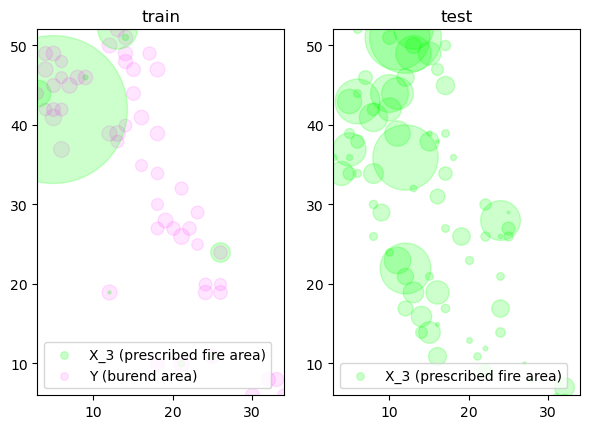

In [24]:

# plot but transposed ver

plt.figure(figsize = (7,10))
plt.subplot(1,2,1)
for i,x in enumerate(x_train[:-1]):
    plt.scatter(x[0],x[1],s=x[-1], color = 'lime',alpha =0.2)
    plt.scatter(x[0],x[1],s=10*np.log1p(y_train[i]), alpha =0.1, color = 'magenta')    
x = x_test[-1]
i = -1
plt.scatter(x[0],x[1],s=x[-1], color = 'lime',alpha =0.2, label='X_3 (prescribed fire area)')
plt.scatter(x[0],x[1],s=10*np.log1p(y_train[i]), alpha =0.1, color = 'magenta', label='Y (burend area)')    
plt.gca().set_aspect('equal')    
plt.title('train')
plt.xlim(np.min(np.array(x_train), 0)[0], np.max(np.array(x_train), 0)[0])
plt.ylim(np.min(np.array(x_train), 0)[1], np.max(np.array(x_train), 0)[1])
lgd = plt.legend()
lgd.legendHandles[0]._sizes = [30]
lgd.legendHandles[1]._sizes = [30]



plt.subplot(1,2,2)
for i,x in enumerate(x_test[:-1]):
    plt.scatter(x[0],x[1],s=x[-1], color = 'lime',alpha =0.2)
x = x_test[-1]
plt.scatter(x[0],x[1],s=x[-1], color = 'lime',alpha =0.2, label='X_3 (prescribed fire area)')    
plt.gca().set_aspect('equal')    
plt.title('test');
lgd = plt.legend()
lgd.legendHandles[0]._sizes = [30]
plt.xlim(np.min(np.array(x_train), 0)[0], np.max(np.array(x_train), 0)[0])
plt.ylim(np.min(np.array(x_train), 0)[1], np.max(np.array(x_train), 0)[1])

In [396]:
len(z_train_label)

10

In [404]:
z = np.c_[x_train[:,-1], z_train]
z = z/np.max(z,0)
z_grid = np.c_[x_test[:,-1], z_test]
z_grid = z_grid/np.max(z_grid,0)

In [418]:
simu_data = {'Nsample':len(x_train), 
             "Npred":len(x_test), 
             "D":1 + len(z_train_label), 
             "x":x_train[:,:2], 
             "z":z,
             "log_y":np.log1p(y_train), 
             "x_grid":x_test[:,:2],
             "z_grid":z_grid
            }

# modeling part

In [410]:
import pickle 
pickle.dump(simu_data, open('/home/ubuntu/sequoia/datasets/simu_data_2d_exp.pkl','wb'))
simu_data['z'][:,-1] = np.log1p(simu_data['z'][:,-1])
simu_data['z_grid'][:,-1] = np.log1p(simu_data['z_grid'][:,-1])

In [411]:
import os
from cmdstanpy import CmdStanModel


In [412]:
simu_data = pickle.load(open('/home/ubuntu/sequoia/datasets/simu_data_2d_exp.pkl','rb'))
print(simu_data.keys())

dict_keys(['Nsample', 'Npred', 'D', 'x', 'z', 'log_y', 'x_grid', 'z_grid'])


In [416]:
simu_data['z_grid'].shape

(91, 1)

In [413]:
simu_data["D"]

11

In [414]:
stan_file = os.path.join('stanfiles','gp_gabriuma_2d_exp.stan')
model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp info
cwd: None


CmdStanModel: name=gp_gabriuma_2d_exp
	 stan_file=/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [419]:
opt = model.optimize(data=simu_data)
opt.stan_variable('rho')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4x55ozc/v3dcfstv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp', 'random', 'seed=5449', 'data', 'file=/tmp/tmpy4x55ozc/v3dcfstv.json', 'output', 'file=/tmp/tmpy4x55ozc/gp_gabriuma_2d_expw8m7cw0j/gp_gabriuma_2d_exp-20221211224909.csv', 'method=optimize']
22:49:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:49:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


array([5.27335 , 0.259975])

In [577]:
opt.converged

True

In [579]:
opt.optimized_params_dict

OrderedDict([('lp__', 728.762),
             ('rho[1]', 5.27335),
             ('rho[2]', 0.259975),
             ('beta[1]', 0.449268),
             ('beta[2]', 0.792582),
             ('beta[3]', 0.772399),
             ('beta[4]', 9.50125),
             ('beta[5]', 1.99935),
             ('beta[6]', 8.48758),
             ('beta[7]', 1.11351),
             ('beta[8]', 3.18687),
             ('beta[9]', 4.17961),
             ('beta[10]', 1.92422),
             ('beta[11]', 2.47567),
             ('sigma', 3.90961e-18),
             ('eta', 9.57712),
             ('alpha[1]', 4.71102e-08),
             ('alpha[2]', 6.83171e-06),
             ('f[1]', -9.61695e-11),
             ('f[2]', 1.69459e-10),
             ('f[3]', -6.25049e-11),
             ('f[4]', -7.16668e-11),
             ('f[5]', -1.21752e-11),
             ('f[6]', -1.74635e-11),
             ('f[7]', 1.1637e-11),
             ('f[8]', 4.73812e-11),
             ('f[9]', 4.77868e-11),
             ('f[10]', 3.61819e-1

In [580]:
opt.stan_variable('beta')

array([0.449268, 0.792582, 0.772399, 9.50125 , 1.99935 , 8.48758 ,
       1.11351 , 3.18687 , 4.17961 , 1.92422 , 2.47567 ])

In [573]:
opt.stan_variable('alpha')

array([4.71102e-08, 6.83171e-06])

In [574]:
model.optimize??

In [420]:

fit = model.sample(data=simu_data,iter_warmup=500, iter_sampling=1000,
                   chains=4, parallel_chains=4,show_console=False)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpy4x55ozc/2mayzm0o.json
DEBUG:cmdstanpy:cmd: /home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp info
cwd: None
22:49:12 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:idx 3
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp', 'id=1', 'random', 'seed=3764', 'data', 'file=/tmp/tmpy4x55ozc/2mayzm0o.json', 'output', 'file=/tmp/tmpy4x55ozc/gp_gabriuma_2d_expk4222na7/gp_gabriuma_2d_exp-20221211224912_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp', 'id=2', 'random', 'seed=3764', 'data', 'file=/tmp/tmpy4x55ozc/2mayzm0o.json', 'output', 'file=/tmp/tmpy4x55ozc/gp_gabriuma_2d_expk4222na7/gp_gabriuma_2d_exp-20221211224912_2.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBU

22:49:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/ubuntu/sequoia/stanfiles/gp_gabriuma_2d_exp', 'id=1', 'random', 'seed=3764', 'data', 'file=/tmp/tmpy4x55ozc/2mayzm0o.json', 'output', 'file=/tmp/tmpy4x55ozc/gp_gabriuma_2d_expk4222na7/gp_gabriuma_2d_exp-20221211224912_1.csv', 'method=sample', 'num_samples=1000', 'num_warmup=500', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpy4x55ozc/gp_gabriuma_2d_expk4222na7/gp_gabriuma_2d_exp-20221211224912_1.csv
 console_msgs (if any):
	/tmp/tmpy4x55ozc/gp_gabriuma_2d_expk4222na7/gp_gabriuma_2d_exp-20221211224912_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 500
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engag

22:49:47 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 4 had 8 divergent transitions (0.8%)
	Use function "diagnose()" to see further information.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 4 had 8 divergent transitions (0.8%)
	Use function "diagnose()" to see further information.


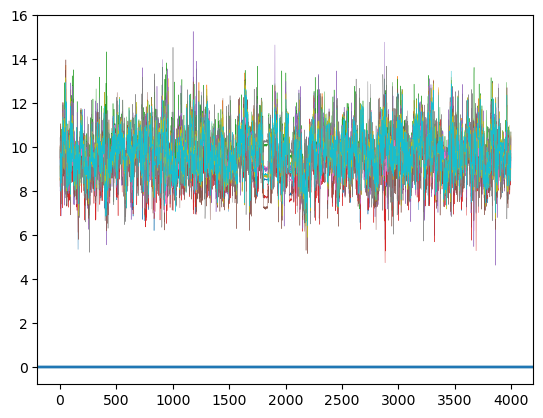

In [421]:
for i in np.random.choice(len(simu_data['x_grid']), size= 10, replace = False):
    plt.plot(fit.stan_variable('f_grid')[:,i], lw = .3)
    plt.axhline()

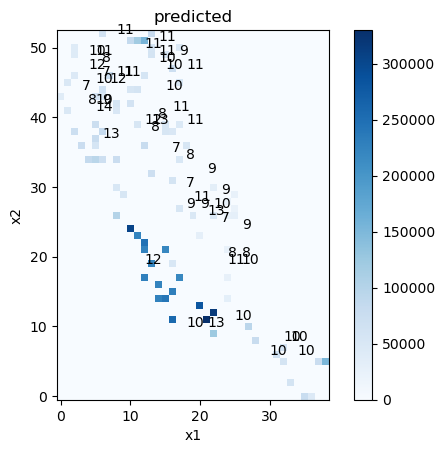

In [422]:
img = np.zeros(((np.max(simu_data['x_grid'],0)- np.min(simu_data['x_grid'],0))+1).astype(int)[:2]).T

for i,x in enumerate(simu_data['x_grid']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    img[p[1],p[0]] = (np.mean(fit.stan_variable('y_grid_predict'),0)[i])
    
plt.imshow(img, cmap = "Blues")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('predicted')
plt.colorbar()
for i,x in enumerate(simu_data['x']):
#     p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    p=x
    plt.text(p[0],p[1], str(np.around((simu_data['log_y'][i])).astype(int)))
plt.gca().invert_yaxis()


Text(0.5, 0.98, 'original scaled Y ')

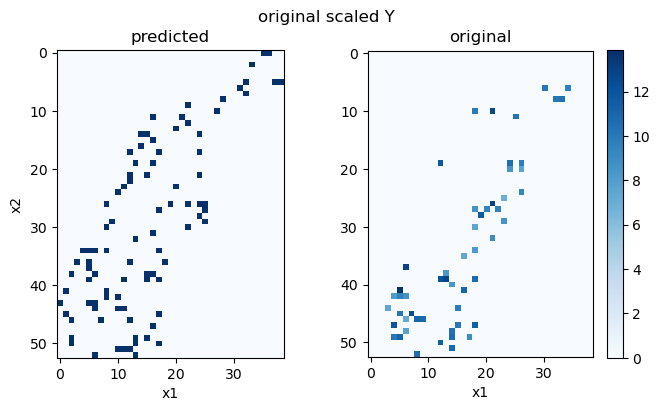

In [423]:
img = np.zeros(((np.max(simu_data['x_grid'],0)- np.min(simu_data['x_grid'],0))+1).astype(int)[:2]).T
for i,x in enumerate(simu_data['x_grid']):
    p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
    img[p[1],p[0]] = (np.mean(fit.stan_variable('y_grid_predict'),0)[i])
    
    
img_foo = np.zeros_like(img)
for m,p in enumerate(simu_data['x']):
    p = p.astype(int)
    img_foo[p[1],p[0]]=simu_data['log_y'][m]
    
    
plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.imshow(img, cmap = "Blues", 
           vmin = img_foo.min(), vmax = img_foo.max())
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('predicted')
# plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_foo, cmap = "Blues")
plt.xlabel('x1')
plt.title('original')
plt.colorbar()
# for i,x in enumerate(simu_data['x']):
#     p = ((x-np.min(simu_data['x_grid'],0))).astype(int)
#     plt.scatter(p[0],p[1], s=10*np.clip(simu_data['log_y'][i],0,None), 
#                 alpha = 0.1,facecolor = None,edgecolor = 'magenta')
plt.suptitle('original scaled Y ')    


Text(0.5, 0.98, 'log scaled Y ')

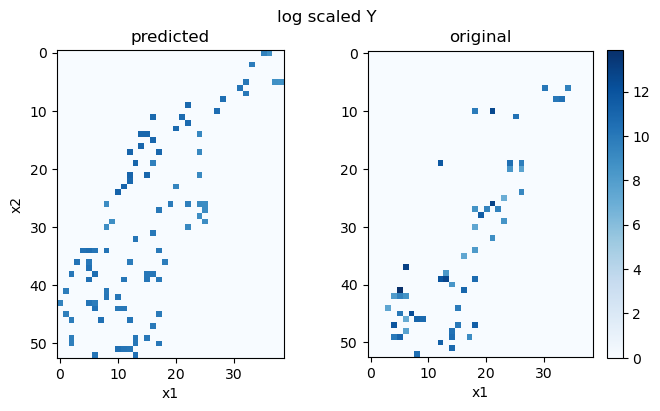

In [425]:
   
plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.imshow(img, cmap = "Blues", 
           vmin = img_foo.min(), vmax = img_foo.max())
plt.ylabel('x2')
plt.xlabel('x1')
plt.title('predicted')
# plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(img_foo, cmap = "Blues")
plt.xlabel('x1')
plt.title('original')
plt.colorbar()    
plt.suptitle('log scaled Y ')

In [426]:
from scipy import stats
stats.pearsonr((simu_data['z_grid'][:,0]),np.log1p(np.mean(fit.stan_variable('y_grid_predict'),0)))

PearsonRResult(statistic=0.11800977814879741, pvalue=0.2652459376680585)

Text(0.5, 1.0, 'beta samples')

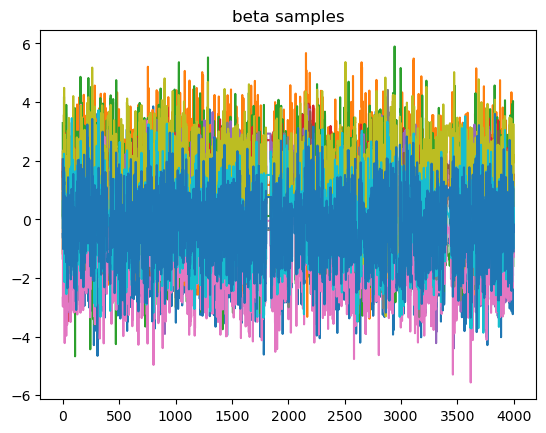

In [428]:
plt.plot(fit.stan_variable('beta'))
plt.title('beta samples')

In [429]:
fit.stan_variable('beta').shape

(4000, 11)

In [439]:
coeff_names = ['prescribed fire']
[coeff_names.append(s.split('_')[-1]) for s in z_train_label]
print(coeff_names)

[None, None, None, None, None, None, None, None, None, None]

In [454]:
np.std(fit.stan_variable('beta'), 0)

array([1.30981882, 1.40948423, 1.46166707, 1.05566557, 1.22430335,
       0.96922944, 1.18566607, 0.99718266, 1.19581842, 1.10008608,
       1.06972642])

In [470]:
order = np.argsort(np.mean(fit.stan_variable('beta'),0))

In [472]:
order

array([ 6,  0, 10,  9,  4,  7,  5,  2,  3,  1,  8])

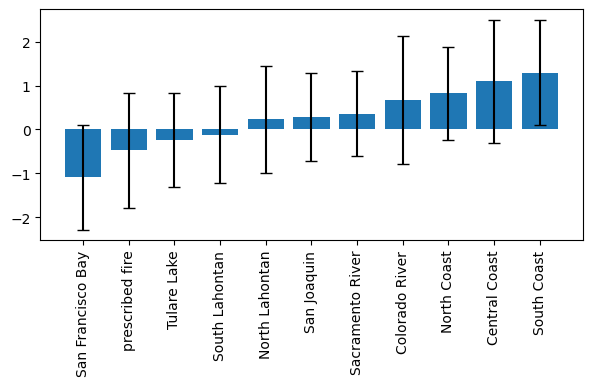

In [473]:
plt.figure(figsize = (7,3))
plt.bar(np.arange(11), np.mean(fit.stan_variable('beta'), 0)[order], 
        yerr=np.std(fit.stan_variable('beta'), 0)[order], 
        capsize=4)
plt.xticks(range(11), [coeff_names[m] for m in order], rotation = 90);
# plt.axhline(0, lw=1, color='r')

In [558]:
import matplotlib

cmap = matplotlib.cm.get_cmap('tab10')
cmap(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [559]:
coeff_names

['prescribed fire',
 'Central Coast',
 'Colorado River',
 'North Coast',
 'North Lahontan',
 'Sacramento River',
 'San Francisco Bay',
 'San Joaquin',
 'South Coast',
 'South Lahontan',
 'Tulare Lake']

In [560]:
order

array([ 6,  0, 10,  9,  4,  7,  5,  2,  3,  1,  8])

In [569]:
col_list = []
for k,m in enumerate(order):  # 0-10
    if m==0:
        col_list.append("black")
    else:
        col_list.append(cmap.colors[:10][m-1])
        

In [570]:
cmap.colors

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

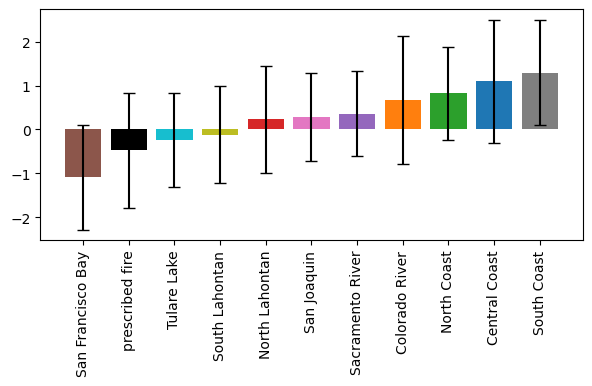

In [571]:
# col_list = ['black']
# [col_list.append(cmap.colors[m]) for m in range(10)]

plt.figure(figsize = (7,3))
plt.bar(np.arange(11), np.mean(fit.stan_variable('beta'), 0)[order], 
        yerr=np.std(fit.stan_variable('beta'), 0)[order], 
        capsize=4, 
        color=col_list
       )
plt.xticks(range(11), [coeff_names[m] for m in order], rotation = 90);

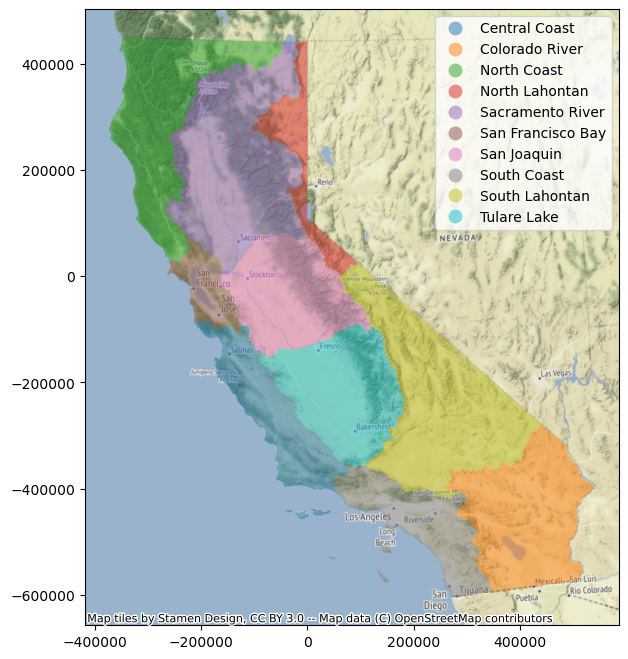

In [572]:
ax = cali.boundary.plot(color='red', alpha = 0, lw = 1,figsize = (8,8))
df_wat.plot(ax = ax, column='HRNAME',legend=True, alpha =.51,cmap = 'tab10')
cx.add_basemap(ax,crs=df_grove.crs.to_string(), alpha = 1)


In [582]:
stats.pearsonr(opt.stan_variable('beta'),np.mean(fit.stan_variable('beta'), 0))

PearsonRResult(statistic=0.35450411440999113, pvalue=0.28475288973114044)

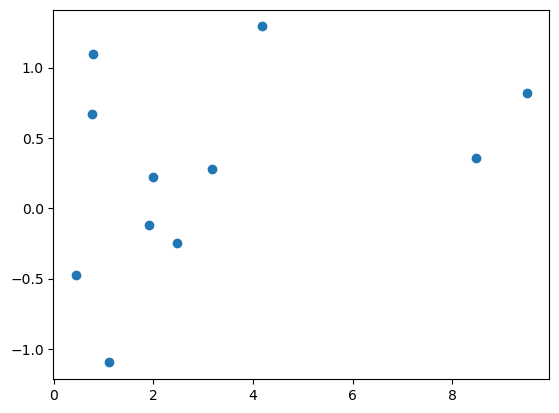

In [581]:
plt.scatter(opt.stan_variable('beta'),np.mean(fit.stan_variable('beta'), 0))

In [583]:
opt.stan_variable('eta'),np.mean(fit.stan_variable('eta'))

(9.57712, 1.2810025272499999)

In [584]:

opt.stan_variable('rho'),np.mean(fit.stan_variable('rho'),0)

(array([5.27335 , 0.259975]), array([45.66800574, 87.34716902]))

In [585]:

opt.stan_variable('alpha'),np.mean(fit.stan_variable('alpha'),0)

(array([4.71102e-08, 6.83171e-06]), array([4.34744565, 1.62526462]))